In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import date
from datetime import datetime

In [3]:
# Carregando base de dados
df = pd.read_pickle('base_nfp.pkl')
df

,CNPJ emit.,Emitente,No.,Data Emissão,Valor NF,Data Registro,Créditos,Situação do Crédito,Ano,Semestre,Retorno,flag_credito,categoria
0,03.476.811/0741-98,DIA BRASIL SOCIEDADE LIMITADA,537,2017-06-30,24.68,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Mercado
1,43.101.310/0001-05,AUTO POSTO ZANWAL LTDA EPP,2894,2017-06-30,50.00,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Auto posto
2,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,699,2017-06-30,27.00,2017-06-30,0.44,Liberado,2017,1,0.016296,1,Restaurantes
3,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,698,2017-06-30,111.50,2017-06-30,1.81,Liberado,2017,1,0.016233,1,Restaurantes
4,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,694,2017-06-30,125.00,2017-06-30,2.03,Liberado,2017,1,0.016240,1,Restaurantes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
187641,22.172.203/0004-40,B.BLEND MAQUINAS E BEBIDAS S. A.,180264,2021-01-07,252.84,2021-01-07,0.00,Liberado,2021,2,0.000000,0,não definido
187642,71.676.316/0005-70,SUPERMERCADOS MAMBO LTDA.,348953,2021-01-07,373.65,2021-01-07,0.00,Liberado,2021,2,0.000000,0,Mercado
187643,61.585.865/0240-93,RAIADROGASIL S/A,190447,2021-01-07,130.71,2021-01-07,0.00,Liberado,2021,2,0.000000,0,Farmácia
187644,67.616.128/0001-55,AYUMI SUPERMERCADOS LTDA - 1,51004,2021-01-07,43.16,2021-01-07,0.00,Liberado,2021,2,0.000000,0,Mercado


In [4]:
# Eliminando dados faltantes
df.dropna(inplace=True)

In [5]:
# Separando os a partir de janeiro de 2020 
data=df[df['Data Registro']>='2020-01-01']

In [6]:
#Criando colunas com 
dia=datetime.now().strftime("%d/%m")
dia_semana=datetime.now().strftime("%A")
mes=datetime.now().strftime("%B")
trimestre=pd.Timestamp(datetime.now()).quarter
ano=datetime.now().strftime("%Y")
print(dia)
print(dia_semana)
print(mes)
print(trimestre)
print(ano)

13/07
Thursday
July
3
2023


# Criando variáveis

In [7]:
#df['trimestre']=pd.to_datetime(df['Data Emissão'])
data['data']=pd.to_datetime(data['Data Emissão'].dt.strftime("%d/%m/%Y"))

C:\Users\General\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '31/12/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\General\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '30/12/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\General\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '29/12/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\General\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '28/12/2019' in DD/MM/YYYY format. Provide format o

C:\Users\General\AppData\Local\Temp\ipykernel_2456\2749925688.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['data']=pd.to_datetime(data['Data Emissão'].dt.strftime("%d/%m/%Y"))


In [8]:
#Criando colunas com dia da semana,dia do mes,mes e trimestre 
data['dia_semana']=data['data'].dt.strftime("%A")
data['dia_mes']=data['data'].dt.strftime("%d")
data['mes']=data['data'].dt.strftime("%m")
data['trimestre']=data['data'].dt.quarter
print(data['dia_semana'])
print(data['dia_mes'])
print(data['mes'])
print(data['trimestre'])


C:\Users\General\AppData\Local\Temp\ipykernel_2456\1078503097.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['dia_semana']=data['data'].dt.strftime("%A")
C:\Users\General\AppData\Local\Temp\ipykernel_2456\1078503097.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['dia_mes']=data['data'].dt.strftime("%d")


64598     Wednesday
64599     Wednesday
64600     Wednesday
64601     Wednesday
64602     Wednesday
            ...    
187641     Thursday
187642     Thursday
187643     Thursday
187644     Thursday
187645     Thursday
Name: dia_semana, Length: 86155, dtype: object
64598     01
64599     01
64600     01
64601     01
64602     01
          ..
187641    01
187642    01
187643    01
187644    01
187645    01
Name: dia_mes, Length: 86155, dtype: object
64598     01
64599     01
64600     01
64601     01
64602     01
          ..
187641    07
187642    07
187643    07
187644    07
187645    07
Name: mes, Length: 86155, dtype: object
64598     1
64599     1
64600     1
64601     1
64602     1
         ..
187641    3
187642    3
187643    3
187644    3
187645    3
Name: trimestre, Length: 86155, dtype: int64


C:\Users\General\AppData\Local\Temp\ipykernel_2456\1078503097.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['mes']=data['data'].dt.strftime("%m")
C:\Users\General\AppData\Local\Temp\ipykernel_2456\1078503097.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['trimestre']=data['data'].dt.quarter


In [10]:
#Separando a variavél Valor NF por quartil
data['quartil_5']=pd.qcut(data['Valor NF'],q=5)
data['quartil_10']=pd.qcut(data['Valor NF'],q=10)
data['quartil_20']=pd.qcut(data['Valor NF'],q=20)
data['quartil_50']=pd.qcut(data['Valor NF'],q=50)

C:\Users\General\AppData\Local\Temp\ipykernel_2456\3269756923.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['quartil_5']=pd.qcut(data['Valor NF'],q=5)
C:\Users\General\AppData\Local\Temp\ipykernel_2456\3269756923.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['quartil_10']=pd.qcut(data['Valor NF'],q=10)
C:\Users\General\AppData\Local\Temp\ipykernel_2456\3269756923.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

# Calculando o IV de todas essas variáveis

In [11]:
data.columns

Index(['CNPJ emit.', 'Emitente', 'No.', 'Data Emissão', 'Valor NF',
       'Data Registro', 'Créditos', 'Situação do Crédito', 'Ano', 'Semestre',
       'Retorno', 'flag_credito', 'categoria', 'data', 'dia_semana', 'dia_mes',
       'mes', 'trimestre', 'quartil_5', 'quartil_10', 'quartil_20',
       'quartil_50'],
      dtype='object')

In [12]:
data.drop(columns=['CNPJ emit.','Emitente','No.'],inplace=True)


C:\Users\General\AppData\Local\Temp\ipykernel_2456\1625363047.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['CNPJ emit.','Emitente','No.'],inplace=True)


In [13]:
metadados=pd.DataFrame({'dtypes': data.dtypes})
metadados

,dtypes
Data Emissão,datetime64[ns]
Valor NF,float64
Data Registro,datetime64[ns]
Créditos,float64
Situação do Crédito,category
Ano,int64
Semestre,int64
Retorno,float64
flag_credito,int64
categoria,object


In [14]:
# Criando um metadado
metadados['papel']='covariavel'
metadados.loc['flag_credito','papel']='resposta'
metadados['nunique']=data.nunique()
metadados

,dtypes,papel,nunique
Data Emissão,datetime64[ns],covariavel,769
Valor NF,float64,covariavel,28401
Data Registro,datetime64[ns],covariavel,734
Créditos,float64,covariavel,7865
Situação do Crédito,category,covariavel,3
Ano,int64,covariavel,3
Semestre,int64,covariavel,2
Retorno,float64,covariavel,35946
flag_credito,int64,resposta,2
categoria,object,covariavel,9


In [100]:
#Criando um função para definir o Information Value
def IV(variavel,resposta):
    tab=pd.crosstab(variavel,resposta,margins=True,margins_name='total')
    
    tab['pct_nao_evento']=tab[0]/tab.loc['total',0]
    tab['pct_evento']=tab[1]/tab.loc['total',1]
    tab['woe']=np.log(tab['pct_evento']/tab['pct_nao_evento'])
    tab['iv_parcial']=(tab.pct_evento - tab.pct_nao_evento)*tab.woe
    return tab['iv_parcial'].sum()

iv=IV(data.mes,data.flag_credito)
iv
    

0.02199398331950023

In [16]:
iv=IV(data['Situação do Crédito'],data.flag_credito)
iv

C:\Users\General\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


inf

In [17]:
metadados[metadados.papel=='covariavel'].index

Index(['Data Emissão', 'Valor NF', 'Data Registro', 'Créditos',
       'Situação do Crédito', 'Ano', 'Semestre', 'Retorno', 'categoria',
       'data', 'dia_semana', 'dia_mes', 'mes', 'trimestre', 'quartil_5',
       'quartil_10', 'quartil_20', 'quartil_50'],
      dtype='object')

In [18]:
for var in metadados.index:
    metadados.loc[var,'IV']= IV(data[var],data.flag_credito)

C:\Users\General\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\General\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\General\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\General\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\General\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\General\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero enco

In [19]:
for var in metadados[metadados.papel=='covariavel'].index:
    if (metadados.loc[var,'nunique']>50):
        metadados.loc[var,'IV']= IV(pd.qcut(data[var],q=5,duplicates='drop'), data.flag_credito)
    else:
        metadados.loc[var,'IV']= IV(data[var],data.flag_credito)
        
metadados

C:\Users\General\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,dtypes,papel,nunique,IV
Data Emissão,datetime64[ns],covariavel,769,0.004416
Valor NF,float64,covariavel,28401,0.044866
Data Registro,datetime64[ns],covariavel,734,0.005474
Créditos,float64,covariavel,7865,inf
Situação do Crédito,category,covariavel,3,inf
Ano,int64,covariavel,3,0.004477
Semestre,int64,covariavel,2,0.003908
Retorno,float64,covariavel,35946,inf
flag_credito,int64,resposta,2,inf
categoria,object,covariavel,9,0.240871


In [20]:
tab=pd.crosstab(data.categoria,data.flag_credito,margins=True,margins_name='total').sort_values(by=1,ascending=False)
tab

flag_credito,0,1,total
categoria,,,
total,48724,37431,86155
Mercado,14383,13196,27579
Construção,8523,7537,16060
não definido,11684,6737,18421
Farmácia,6611,3590,10201
Alimentos,1609,3452,5061
Restaurantes,553,1637,2190
Varejo,3484,704,4188
Vestuário,1472,443,1915


In [103]:
#Criando um coluna com percentual de eventos e não eventos
tab['pct_nao_evento']=tab[0]/tab.loc['total',0]
tab['pct_evento']=tab[1]/tab.loc['total',1]
tab['WOE']= np.log(tab['pct_evento']/tab['pct_nao_evento'])
tab['iv_parcial']=(tab.pct_evento - tab.pct_nao_evento)*tab.WOE
tab

flag_credito,0,1,total,pct_nao_evento,pct_evento,WOE,iv_parcial
categoria,,,,,,,
total,48724,37431,86155,1.000000,1.000000,0.000000,0.000000
Mercado,14383,13196,27579,0.295193,0.352542,0.177539,0.010182
Construção,8523,7537,16060,0.174924,0.201357,0.140728,0.003720
não definido,11684,6737,18421,0.239800,0.179985,-0.286933,0.017163
Farmácia,6611,3590,10201,0.135683,0.095910,-0.346910,0.013798
Alimentos,1609,3452,5061,0.033023,0.092223,1.027013,0.060799
Restaurantes,553,1637,2190,0.011350,0.043734,1.348935,0.043684
Varejo,3484,704,4188,0.071505,0.018808,-1.335485,0.070376
Vestuário,1472,443,1915,0.030211,0.011835,-0.937135,0.017221


# Conclusão 

Quais variáveis parecem apresentar maior poder de discriminação segundo o IV?
 - <font color='red'> Resposta </font> : Mercado e Construção
 
Quando categorizamos variáveis contínuas parece haver alguma relação entre o número de categorias e o IV?
 - <font color='red'> Resposta </font> : Aparentemente quanto maior o número de categorias maior a discriminação

## Descritiva simples no tempo

Para compor a análise que virá a seguir, faça uma análise descritiva básica no tempo - utilize trimestre como agregação (ou uma média móvel por trimestre, como preferir) e avalie graficamente:

- A quantidade de notas registradas na base por período
- A quantidade de notas por categoria e por período
- A proporção de notas com crédito por categoria por período

In [22]:
data.columns

Index(['Data Emissão', 'Valor NF', 'Data Registro', 'Créditos',
       'Situação do Crédito', 'Ano', 'Semestre', 'Retorno', 'flag_credito',
       'categoria', 'data', 'dia_semana', 'dia_mes', 'mes', 'trimestre',
       'quartil_5', 'quartil_10', 'quartil_20', 'quartil_50'],
      dtype='object')

In [27]:
qtd_nota_periodo=data.groupby('trimestre')['Valor NF'].count()
qtd_nota_periodo = pd.DataFrame(qtd_nota_periodo)

C:\Users\General\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


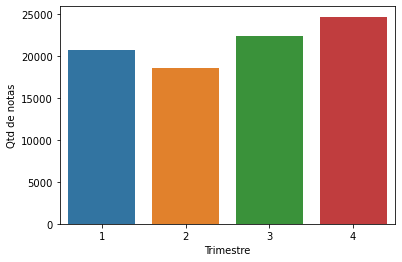

In [76]:
#fig,ax = plt.subplots(figsize=(12,8))
sns.barplot(qtd_nota_periodo.index,qtd_nota_periodo['Valor NF'])
plt.ylabel('Qtd de notas')
plt.xlabel('Trimestre')
plt.show()

- O 4º trimestre teve o maior número de notas registradas

In [86]:
qtd_nota_categoria=data.groupby('categoria')['Valor NF'].count()
qtd_nota_categoria=pd.DataFrame(qtd_nota_categoria).sort_values(by='Valor NF')


C:\Users\General\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


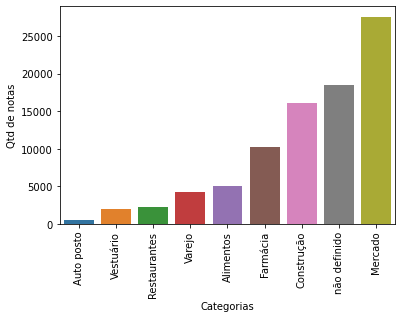

In [85]:
sns.barplot(qtd_nota_categoria.index,qtd_nota_categoria['Valor NF'])
plt.ylabel('Qtd de notas')
plt.xlabel('Categorias')
plt.xticks(rotation=90)
plt.show()

In [94]:
qtd_nota_credito=data.groupby(['flag_credito','categoria','trimestre'])['Valor NF'].count()
qtd_nota_credito=pd.DataFrame(qtd_nota_credito).sort_values(by='Valor NF')
qtd_nota_credito.reset_index(inplace=True)
qtd_nota_credito

,flag_credito,categoria,trimestre,Valor NF
0,1,Auto posto,2,17
1,1,Auto posto,3,35
2,1,Auto posto,4,39
3,1,Auto posto,1,44
4,1,Vestuário,2,52
...,...,...,...,...
67,0,Mercado,1,3501
68,1,Mercado,4,3570
69,0,não definido,4,3658
70,0,Mercado,4,3675


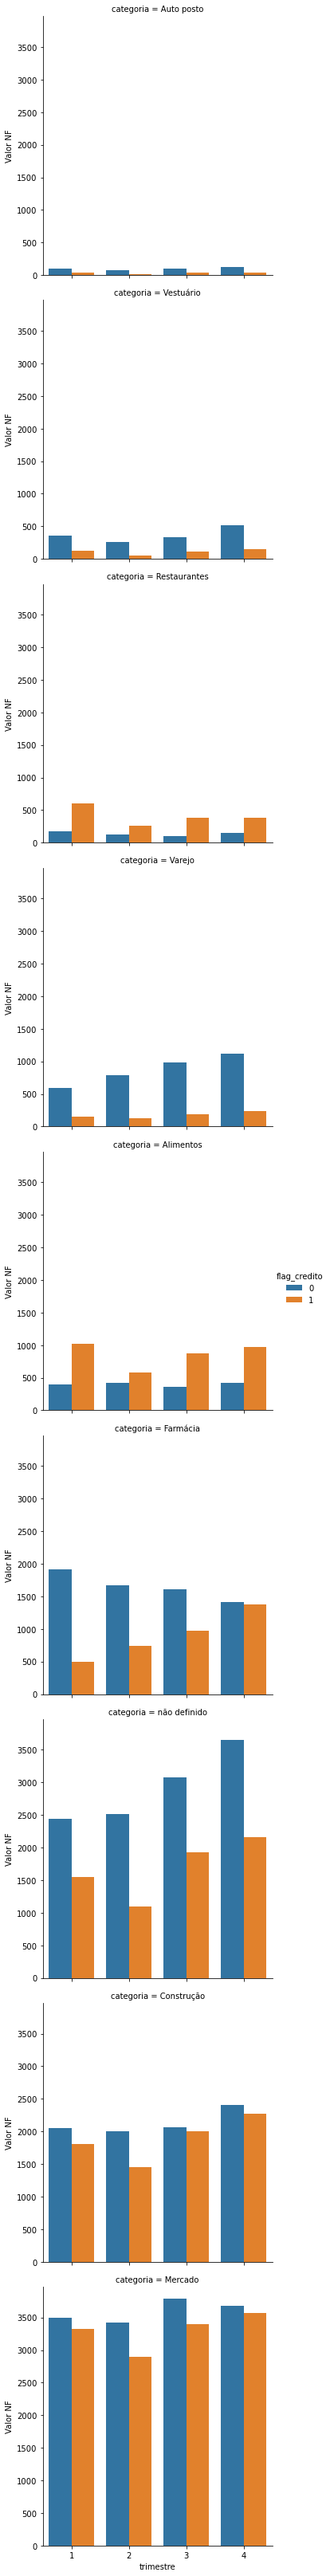

In [98]:
sns.catplot(data=qtd_nota_credito, kind="bar", x="trimestre", y="Valor NF",row='categoria', hue="flag_credito")

## Avaliando o WOE e o IV no tempo

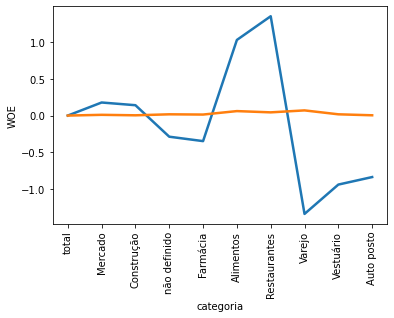

In [111]:
sns.lineplot(data=tab,x=tab.index,y='WOE',palette="tab10", linewidth=2.5)
sns.lineplot(data=tab,x=tab.index,y='iv_parcial',palette="tab10", linewidth=2.5)
plt.xticks(rotation=90)
plt.show()